In [6]:
import numpy as np
import pandas as pd

# Taille totale
n = 1000  

# Proportions par tranche
parts = {
    "moins_15": (0, 14, 0.35),   # 0 à 14 ans inclus
    "15_30": (15, 29, 0.20),     # 15 à 29
    "30_45": (30, 44, 0.25),     # 30 à 44
    "45_60": (45, 59, 0.20)      # 45 à 59
}

# Génération
ages = []
for (a, b, p) in [(v[0], v[1], v[2]) for v in parts.values()]:
    n_part = int(n * p)
    # Tirage d'âges entiers uniformes dans la tranche
    ages.extend(np.random.randint(a, b+1, n_part))

# Ajustement si arrondi
while len(ages) < n:
    ages.append(np.random.randint(0, 15))
ages = np.array(ages)

# Mélanger
np.random.shuffle(ages)

# Vérification des proportions
df = pd.Series(pd.cut(ages, bins=[0,15,30,45,60], right=False)).value_counts(normalize=True)
print("Proportions par tranche :")
print(df)

print("\nAperçu des âges générés :", ages[:20])



Proportions par tranche :
[0, 15)     0.35
[30, 45)    0.25
[15, 30)    0.20
[45, 60)    0.20
Name: proportion, dtype: float64

Aperçu des âges générés : [41  9  1  1 35 18  7 43 49 29 49  5 59 25  7 30 55 38 15 47]


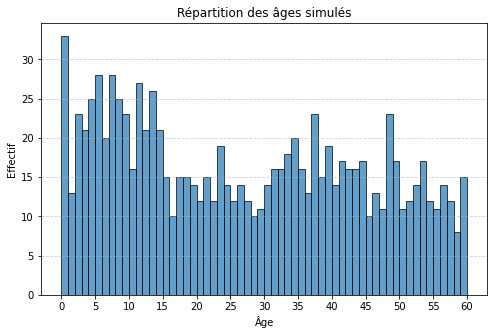

In [7]:
import matplotlib.pyplot as plt

# Histogramme
plt.figure(figsize=(8,5))
plt.hist(ages, bins=range(0, 61), edgecolor="black", alpha=0.7)
plt.title("Répartition des âges simulés")
plt.xlabel("Âge")
plt.ylabel("Effectif")
plt.xticks(range(0, 61, 5))
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()